In [1]:
import numpy as np
import sys
sys.path.append(r"C:\Users\Thinkbook 14\AIMaP")
from AI_thrember.model import read_vectorized_features

ModuleNotFoundError: No module named 'AI_thrember'

In [12]:
import AI_thrember.model
AI_thrember.model.__file__

'C:\\Users\\Thinkbook 14\\AIMaP\\AI_thrember\\model.py'

In [21]:
import importlib
import AI_thrember.model
importlib.reload(AI_thrember.model)

<module 'AI_thrember.model' from 'C:\\Users\\Thinkbook 14\\AIMaP\\AI_thrember\\model.py'>

In [2]:
from AI_thrember.model import read_vectorized_features
import inspect
print(inspect.getsource(read_vectorized_features))

ModuleNotFoundError: No module named 'AI_thrember'

In [23]:
data_dir = r"C:\Users\Thinkbook 14\AIMaP\data\ember_data"

X_train, y_train = read_vectorized_features(data_dir, "train")
X_test, y_test = read_vectorized_features(data_dir, "test")


print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(5252000, 2568) (5252000,)
(1212000, 2568) (1212000,)


In [26]:
import lightgbm as lgb

def create_lgb_binary_file(X_memmap, y_memmap, output_path):
    dataset = lgb.Dataset(X_memmap, label=y_memmap)
    dataset.save_binary(output_path)
    return output_path

In [27]:
X, y = read_vectorized_features(data_dir, "train")
create_lgb_binary_file(X, y, "train.bin")

[LightGBM] [Info] Saving data to binary file train.bin


'train.bin'

In [28]:
train_data = lgb.Dataset("train.bin")

params = {
    "objective": "binary",
    "metric": "auc",
    "num_leaves": 1024,
    "learning_rate": 0.02,
    "num_iterations": 800,
    "feature_fraction": 0.8,
    "bagging_fraction": 0.8,
    "num_threads": -1,
}

model = lgb.train(params, train_data)


[LightGBM] [Info] Load from binary file train.bin
[LightGBM] [Info] Number of positive: 2626000, number of negative: 2626000
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 461.792081 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 246483
[LightGBM] [Info] Number of data points in the train set: 5252000, number of used features: 2539
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


In [ ]:
# Evaluate on AUC
import lightgbm as lgb
from sklearn.metrics import roc_auc_score

preds = model.predict(X_test)
auc = roc_auc_score(y_test[y_test != -1], preds[y_test != -1])

print("Test AUC:", auc)


Test AUC: 0.9981395167249398


In [ ]:
# Precision–Recall (PR) Curve
from sklearn.metrics import precision_recall_curve, average_precision_score

ap = average_precision_score(y_test[y_test != -1], preds[y_test != -1])
print("Average Precision:", ap)

Average Precision: 0.9982659016220766


In [ ]:
# FPR at low thresholds
import numpy as np

def fpr_at_threshold(y, p, thr):
    y_true = y[y != -1]
    p = p[y != -1]

    preds = (p >= thr).astype(int)
    fp = ((preds == 1) & (y_true == 0)).sum()
    tn = ((preds == 0) & (y_true == 0)).sum()

    return fp / (fp + tn + 1e-12)

for thr in [0.999, 0.9995, 0.9999]:
    print(thr, "FPR:", fpr_at_threshold(y_test, preds, thr))


0.999 FPR: 1.3201320132013202e-05
0.9995 FPR: 3.3003300330033004e-06
0.9999 FPR: 0.0


In [33]:
from sklearn.metrics import confusion_matrix

# Use threshold = 0.5 (standard)
threshold = 0.5

y_true = y_test[y_test != -1]
y_pred = (preds[y_test != -1] >= threshold).astype(int)

cm = confusion_matrix(y_true, y_pred)
cm


array([[598098,   7902],
       [ 15604, 590396]])

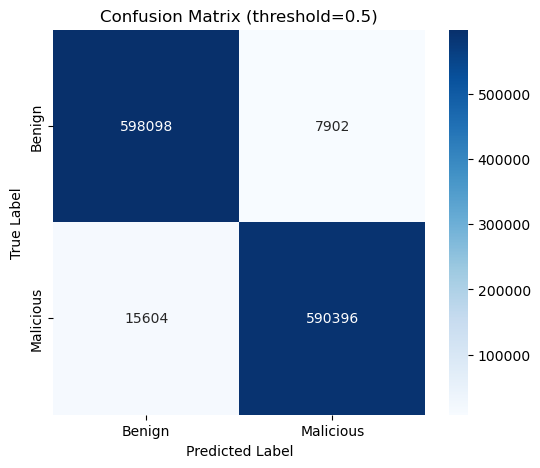

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Benign", "Malicious"],
            yticklabels=["Benign", "Malicious"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title(f"Confusion Matrix (threshold={threshold})")
plt.show()

In [38]:
import lightgbm as lgb

# After training
model.save_model("C:\\Users\\Thinkbook 14\\AIMaP\\models\\aimap_binary_classifier.txt")

print("Model saved successfully!")

Model saved successfully!


In [1]:
import sys
sys.path.append("/projectnb/cs640/students/endrit01/mt")   # modify this path
from AI_thrember.model import read_vectorized_features
import inspect
print(inspect.getsource(read_vectorized_features))

def read_vectorized_features(data_dir: Path | str, subset: str = "train"):
    """
    Read vectorized features using numpy.memmap WITHOUT loading into RAM.
    """
    data_path = Path(data_dir)
    X_path = data_path / f"X_{subset}.dat"
    y_path = data_path / f"y_{subset}.dat"

    if not X_path.is_file():
        raise ValueError(f"Invalid subset file: {X_path}")
    if not y_path.is_file():
        raise ValueError(f"Invalid subset file: {y_path}")

    extractor = PEFeatureExtractor()
    ndim = extractor.dim

    # Determine number of rows in X via file size
    bytes_per_row = ndim * 4   # float32 = 4 bytes
    total_bytes = os.path.getsize(X_path)
    nrows = total_bytes // bytes_per_row

    # Memory-map WITHOUT loading into RAM
    X = np.memmap(X_path, dtype=np.float32, mode="r", shape=(nrows, ndim))
    
    # y is int32 so 4 bytes each
    y_nbytes = os.path.getsize(y_path)
    y_rows = y_nbytes // 4

    # Multilabel case: shape is (nrows, n_labels)
    if y_rows == nro

/projectnb/cs640/students/endrit01/.conda/envs/aimal-310/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
import numpy as np
from collections import Counter

# Load vectorized features
X, y = read_vectorized_features(data_dir, "train")

# Remove -1 labels
mask = y != -1
X = X[mask]
y = y[mask]

# Count family frequency
family_counts = Counter(y)

# Keep ONLY top 123 families
TOP_K = 123
top_families = [fam for fam, cnt in family_counts.most_common(TOP_K)]
top_families = set(top_families)

# Filter dataset
mask = np.array([label in top_families for label in y])
X = X[mask]
y = y[mask]

# Remap labels to 0..122
unique_fams = sorted(list(top_families))
family_to_id = {fam: i for i, fam in enumerate(unique_fams)}

y = np.array([family_to_id[label] for label in y])

print("Final dataset:")
print("X:", X.shape)
print("y:", y.shape)
print("Classes:", len(unique_fams))


Final dataset:
X: (1630868, 2568)
y: (1630868,)
Classes: 123


In [5]:
import json
from pathlib import Path
from collections import Counter

data_dir = "/projectnb/cs640/students/endrit01/mt/data"
paths = sorted([p for p in Path(data_dir).glob("*train*.jsonl")])

family_counter = Counter()
example_family = {}

for fp in paths:
    with fp.open() as f:
        for line in f:
            rec = json.loads(line)
            fam = rec.get("family")
            if fam is None:
                continue
            family_counter[fam] += 1

# sort families like vectorizer
sorted_families = [fam for fam, cnt in family_counter.most_common()]

# Create the mapping the same way LightGBM did
family_to_id = {fam: i for i, fam in enumerate(sorted_families)}
id_to_family = {i: fam for fam, i in family_to_id.items()}

# Save mapping
import json
with open("recovered_family_map.json", "w") as f:
    json.dump(id_to_family, f, indent=2)

print("Recovered mapping saved to recovered_family_map.json")


Recovered mapping saved to recovered_family_map.json


In [6]:
print("\nSelected TOP 123 families:")
for fam, cnt in family_counts.most_common(10):
    print(f"Family {fam}: {cnt} samples")



Selected TOP 123 families:
Family 97: 256862 samples
Family 144: 131580 samples
Family 2: 125068 samples
Family 118: 93006 samples
Family 32: 56178 samples
Family 99: 44220 samples
Family 79: 44148 samples
Family 100: 40864 samples
Family 130: 39912 samples
Family 76: 34642 samples


In [7]:
print("\nTop 10 families by sample count:")
for fam, cnt in family_counts.most_common(10):
    name = id_to_family[fam]
    print(f"{name} (ID={fam}): {cnt} samples")


Top 10 families by sample count:
darkcrystal (ID=97): 256862 samples
dorv (ID=144): 131580 samples
wacatac (ID=2): 125068 samples
soltern (ID=118): 93006 samples
cobaltstrike (ID=32): 56178 samples
pincav (ID=99): 44220 samples
conficker (ID=79): 44148 samples
goblin (ID=100): 40864 samples
marsilia (ID=130): 39912 samples
scarletflash (ID=76): 34642 samples


In [4]:
import sys
sys.path.append("/projectnb/cs640/students/endrit01/mt")

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
from collections import Counter
import time
import os

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils.class_weight import compute_class_weight

from AI_thrember.model import read_vectorized_features
os.environ["CUDA_LAUNCH_BLOCKING"] = "1"



# ============================================================
# 1. LOAD + FILTER TOP 50 FAMILIES
# ============================================================

data_dir = "/projectnb/cs640/students/endrit01/mt/data"
X, y = read_vectorized_features(data_dir, "train")

# Remove unlabeled
mask = y != -1
X = X[mask]
y = y[mask]

# Keep only K families
K = 50
counts = Counter(y)
top_fams = {fam for fam, cnt in counts.most_common(K)}

mask_top = np.array([label in top_fams for label in y])
X = X[mask_top]
y = y[mask_top]

# Remap labels
unique_labels = sorted(np.unique(y))
label_to_idx = {old: i for i, old in enumerate(unique_labels)}
y = np.array([label_to_idx[val] for val in y], dtype=np.int64)

num_classes = len(unique_labels)
print("NUM CLASSES:", num_classes)

# Convert to float32
X = np.array(X, dtype=np.float32)
num_samples, num_features = X.shape
print("X shape:", X.shape)



# ============================================================
# 2. TRAIN/VAL SPLIT + NORMALIZATION
# ============================================================

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.10, stratify=y, random_state=42
)

scaler = StandardScaler()
scaler.fit(X_train)          # critical: fit ONLY on training set
X_train = scaler.transform(X_train)
X_val   = scaler.transform(X_val)

X_train = torch.from_numpy(X_train).float()
y_train = torch.from_numpy(y_train).long()
X_val   = torch.from_numpy(X_val).float()
y_val   = torch.from_numpy(y_val).long()

train_loader = DataLoader(
    TensorDataset(X_train, y_train), batch_size=2048, shuffle=True,
    num_workers=0, pin_memory=True
)

val_loader = DataLoader(
    TensorDataset(X_val, y_val), batch_size=4096, shuffle=False,
    num_workers=0, pin_memory=True
)



# ============================================================
# 3. CLASS WEIGHTS (to fight imbalance)
# ============================================================

weights = compute_class_weight(
    "balanced", classes=np.arange(num_classes), y=y_train.numpy()
)
class_weights = torch.tensor(weights, dtype=torch.float32)



# ============================================================
# 4. MODEL — DEEP MLP (BEST FOR MALWARE STATIC FEATURES)
# ============================================================

class DeepMLP(nn.Module):
    def __init__(self, input_dim, num_classes):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, 2048),
            nn.BatchNorm1d(2048),
            nn.GELU(),
            nn.Dropout(0.3),

            nn.Linear(2048, 1024),
            nn.BatchNorm1d(1024),
            nn.GELU(),
            nn.Dropout(0.3),

            nn.Linear(1024, 512),
            nn.BatchNorm1d(512),
            nn.GELU(),
            nn.Dropout(0.3),

            nn.Linear(512, num_classes)
        )

    def forward(self, x):
        return self.net(x)

model = DeepMLP(num_features, num_classes)



# ============================================================
# 5. TRAINING SETUP
# ============================================================

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

criterion = nn.CrossEntropyLoss(weight=class_weights.to(device))

optimizer = optim.Adam(model.parameters(), lr=1e-3)

scheduler = optim.lr_scheduler.ReduceLROnPlateau(
    optimizer, factor=0.5, patience=2
)

EPOCHS = 20
best_val_loss = float("inf")
patience = 4
counter = 0

print("\nBEGIN TRAINING...\n")



# ============================================================
# 6. TRAINING LOOP
# ============================================================

start = time.time()

for epoch in range(EPOCHS):

    # -------- TRAIN --------
    model.train()
    train_loss = 0.0

    for xb, yb in train_loader:
        xb, yb = xb.to(device), yb.to(device)

        optimizer.zero_grad()
        logits = model(xb)
        loss = criterion(logits, yb)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()

    train_loss /= len(train_loader)



    # -------- VALIDATION --------
    model.eval()
    val_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():
        for xb, yb in val_loader:
            xb, yb = xb.to(device), yb.to(device)

            logits = model(xb)
            loss = criterion(logits, yb)
            val_loss += loss.item()

            preds = torch.argmax(logits, dim=1)
            correct += (preds == yb).sum().item()
            total += len(yb)

    val_loss /= len(val_loader)
    val_acc = correct / total
    scheduler.step(val_loss)

    print(f"Epoch {epoch+1}/{EPOCHS} "
          f"| Train Loss: {train_loss:.4f} "
          f"| Val Loss: {val_loss:.4f} "
          f"| Val Acc: {val_acc:.4f}")



    # -------- EARLY STOPPING --------
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        counter = 0
        torch.save(model.state_dict(), "family_mlp_best.pt")
        print("   ✓ Saved BEST checkpoint")
    else:
        counter += 1
        if counter >= patience:
            print("Early stopping triggered.")
            break



# END TRAINING
print(f"\nTraining time: {(time.time() - start)/60:.2f} minutes")

torch.save(model.state_dict(), "family_mlp_final.pt")
print("Saved final model.")


NUM CLASSES: 50
X shape: (1329968, 2568)

BEGIN TRAINING...

Epoch 1/20 | Train Loss: 0.5270 | Val Loss: 0.3824 | Val Acc: 0.8754
   ✓ Saved BEST checkpoint
Epoch 2/20 | Train Loss: 0.3673 | Val Loss: 0.3252 | Val Acc: 0.8812
   ✓ Saved BEST checkpoint
Epoch 3/20 | Train Loss: 0.3193 | Val Loss: 0.2998 | Val Acc: 0.8917
   ✓ Saved BEST checkpoint
Epoch 4/20 | Train Loss: 0.2882 | Val Loss: 0.2805 | Val Acc: 0.8953
   ✓ Saved BEST checkpoint
Epoch 5/20 | Train Loss: 0.2661 | Val Loss: 0.2688 | Val Acc: 0.9006
   ✓ Saved BEST checkpoint
Epoch 6/20 | Train Loss: 0.2486 | Val Loss: 0.2523 | Val Acc: 0.9008
   ✓ Saved BEST checkpoint
Epoch 7/20 | Train Loss: 0.2356 | Val Loss: 0.2492 | Val Acc: 0.9059
   ✓ Saved BEST checkpoint
Epoch 8/20 | Train Loss: 0.2245 | Val Loss: 0.2321 | Val Acc: 0.9097
   ✓ Saved BEST checkpoint
Epoch 9/20 | Train Loss: 0.2129 | Val Loss: 0.2227 | Val Acc: 0.9148
   ✓ Saved BEST checkpoint
Epoch 10/20 | Train Loss: 0.2055 | Val Loss: 0.2185 | Val Acc: 0.9150
   ✓ 

In [5]:
import torch
import numpy as np
from AI_thrember.model import read_vectorized_features

# -----------------------------------------------------------
# 1. Compute TRAIN accuracy using the trained model
# -----------------------------------------------------------
model.eval()
train_correct = 0
train_total = 0

with torch.no_grad():
    for xb, yb in train_loader:
        xb, yb = xb.to(device), yb.to(device)
        preds = model(xb).argmax(dim=1)
        train_correct += (preds == yb).sum().item()
        train_total += len(yb)

train_acc = train_correct / train_total
print(f"TRAIN ACCURACY: {train_acc:.4f}")


# -----------------------------------------------------------
# 2. Compute VALIDATION accuracy again for comparison
# -----------------------------------------------------------
val_correct = 0
val_total = 0

with torch.no_grad():
    for xb, yb in val_loader:
        xb, yb = xb.to(device), yb.to(device)
        preds = model(xb).argmax(dim=1)
        val_correct += (preds == yb).sum().item()
        val_total += len(yb)

val_acc = val_correct / val_total
print(f"VALIDATION ACCURACY: {val_acc:.4f}")


# -----------------------------------------------------------
# 3. Evaluate on TEST SET (final overfitting check)
# -----------------------------------------------------------
X_test, y_test = read_vectorized_features(data_dir, "test")

# Filter: same families only
mask = np.isin(y_test, unique_labels)
X_test = X_test[mask]
y_test = y_test[mask]
y_test = np.array([label_to_idx[v] for v in y_test])

# normalize test set
X_test = scaler.transform(X_test)

# convert to torch
X_test = torch.from_numpy(X_test).float()
y_test = torch.from_numpy(y_test).long()

test_loader = DataLoader(
    TensorDataset(X_test, y_test),
    batch_size=4096,
    shuffle=False
)

test_correct = 0
test_total = 0

with torch.no_grad():
    for xb, yb in test_loader:
        xb, yb = xb.to(device), yb.to(device)
        preds = model(xb).argmax(dim=1)
        test_correct += (preds == yb).sum().item()
        test_total += len(yb)

test_acc = test_correct / test_total
print(f"TEST ACCURACY: {test_acc:.4f}")


TRAIN ACCURACY: 0.9359
VALIDATION ACCURACY: 0.9277
TEST ACCURACY: 0.8561


Confusion matrix shape: (50, 50)


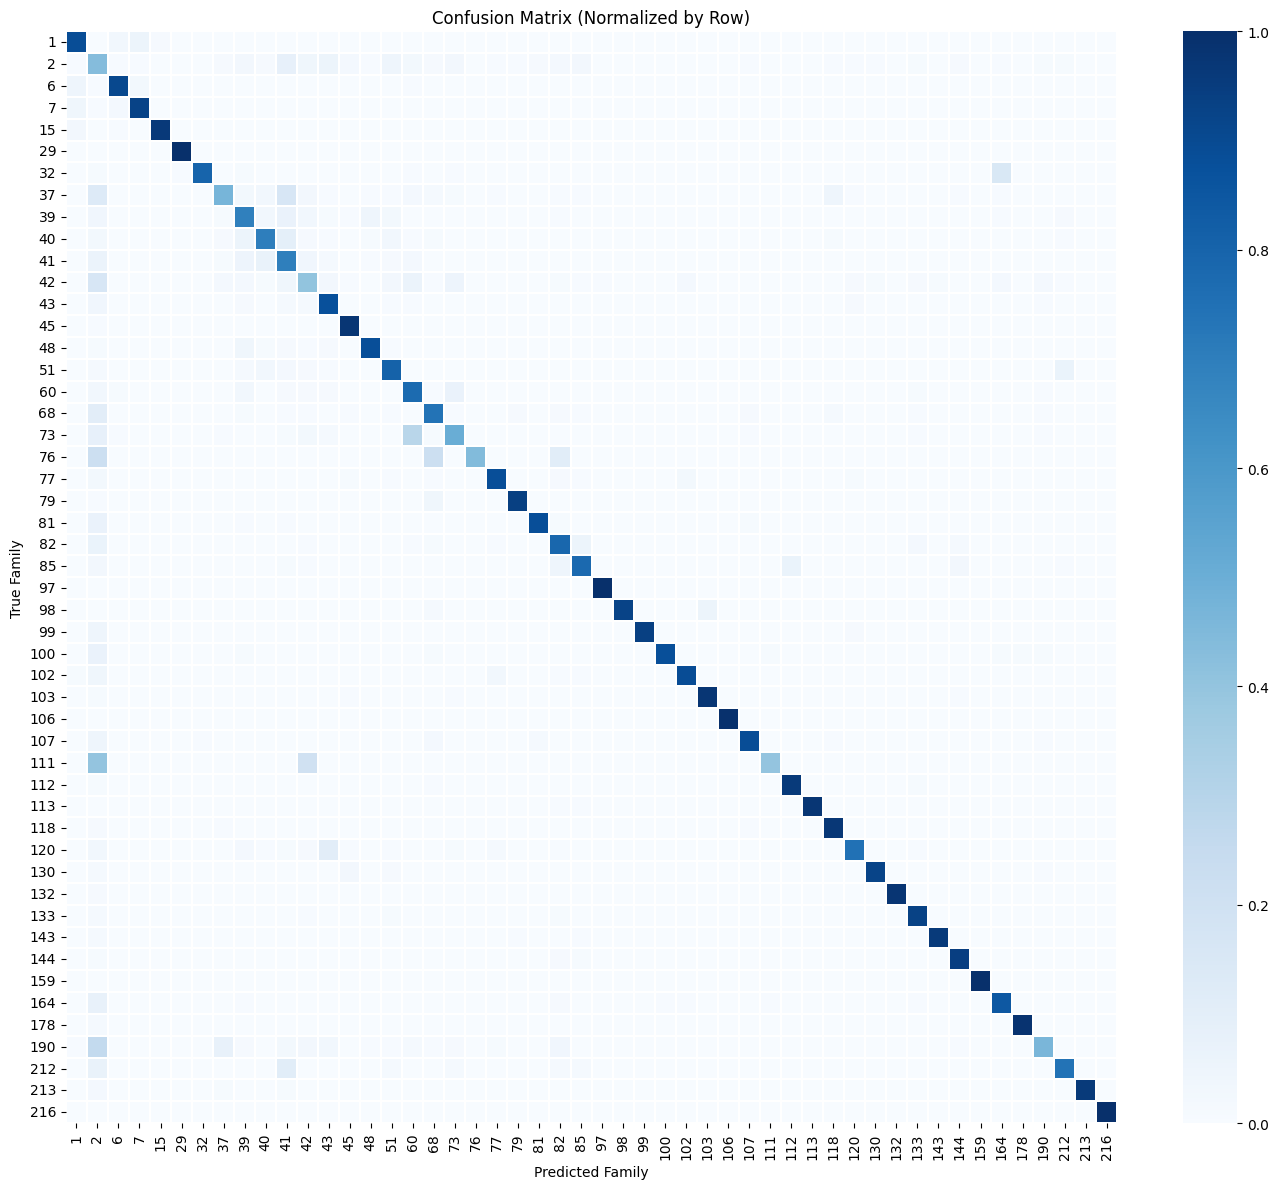

In [8]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

from AI_thrember.model import read_vectorized_features

# ============================================================
# 1. Load TEST set
# ============================================================

X_test, y_test = read_vectorized_features(data_dir, "test")

# Filter test samples to only the selected 50 families
mask = np.isin(y_test, unique_labels)
X_test = X_test[mask]
y_test = y_test[mask]

# Remap labels using training mapping
y_test = np.array([label_to_idx[v] for v in y_test], dtype=np.int64)

# Normalize test set using the training scaler
X_test = scaler.transform(X_test)

X_test_t = torch.from_numpy(X_test).float()
y_test_t = torch.from_numpy(y_test).long()

test_loader = DataLoader(
    TensorDataset(X_test_t, y_test_t),
    batch_size=4096,
    shuffle=False
)

# ============================================================
# 2. Collect predictions
# ============================================================

model.eval()
all_preds = []
all_true  = []

with torch.no_grad():
    for xb, yb in test_loader:
        xb = xb.to(device)
        logits = model(xb)
        preds = torch.argmax(logits, dim=1).cpu().numpy()

        all_preds.extend(preds)
        all_true.extend(yb.numpy())

all_preds = np.array(all_preds)
all_true = np.array(all_true)

# ============================================================
# 3. Compute confusion matrix
# ============================================================

cm = confusion_matrix(all_true, all_preds)
cm_norm = cm.astype("float") / cm.sum(axis=1, keepdims=True)

print("Confusion matrix shape:", cm.shape)

# ============================================================
# 4. Plot confusion matrix (normalized)
# ============================================================

plt.figure(figsize=(14, 12))
sns.heatmap(
    cm_norm,
    cmap="Blues",
    xticklabels=unique_labels,
    yticklabels=unique_labels,
    linewidths=0.2
)

plt.title("Confusion Matrix (Normalized by Row)")
plt.xlabel("Predicted Family")
plt.ylabel("True Family")
plt.tight_layout()
plt.show()


In [9]:
# Load real test set
X_test, y_test = read_vectorized_features(data_dir, "test")

# Filter to same 50 families
mask = np.isin(y_test, unique_labels)
X_test = X_test[mask]
y_test = y_test[mask]
y_test = np.array([label_to_idx[v] for v in y_test], dtype=np.int64)

# Normalize using TRAIN scaler
X_test = scaler.transform(X_test)
X_test = torch.from_numpy(X_test).float().to(device)

# Load best model
model.load_state_dict(torch.load("family_mlp_best.pt"))
model.eval()

correct = 0
total = 0
with torch.no_grad():
    logits = model(X_test)
    preds = torch.argmax(logits, dim=1).cpu().numpy()
    correct = (preds == y_test).sum()
    total = len(y_test)

print("REAL TEST ACCURACY:", correct / total)


REAL TEST ACCURACY: 0.8561156173048329
